# 5. Attitude

In [1]:
data <- read.csv("./Du lieu cung cap/attitude.csv",header=TRUE)
head(data)

,rating,complaints,privileges,learning,raises,critical,advance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


In [2]:
print(is.data.frame(data))

[1] TRUE


In [3]:
print(paste("cols: ", ncol(data)))
print(paste("rows: ", nrow(data)))

[1] "cols:  7"
[1] "rows:  30"


In [4]:
summary(data)

     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

Dữ liệu đồng đều, nên không cần scale.

In [5]:
str(data)

'data.frame':	30 obs. of  7 variables:
 $ rating    : int  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: int  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: int  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : int  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : int  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : int  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : int  45 47 48 35 47 34 35 41 31 41 ...


In [6]:
is.na(data)

rating,complaints,privileges,learning,raises,critical,advance
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [7]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.6.3"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



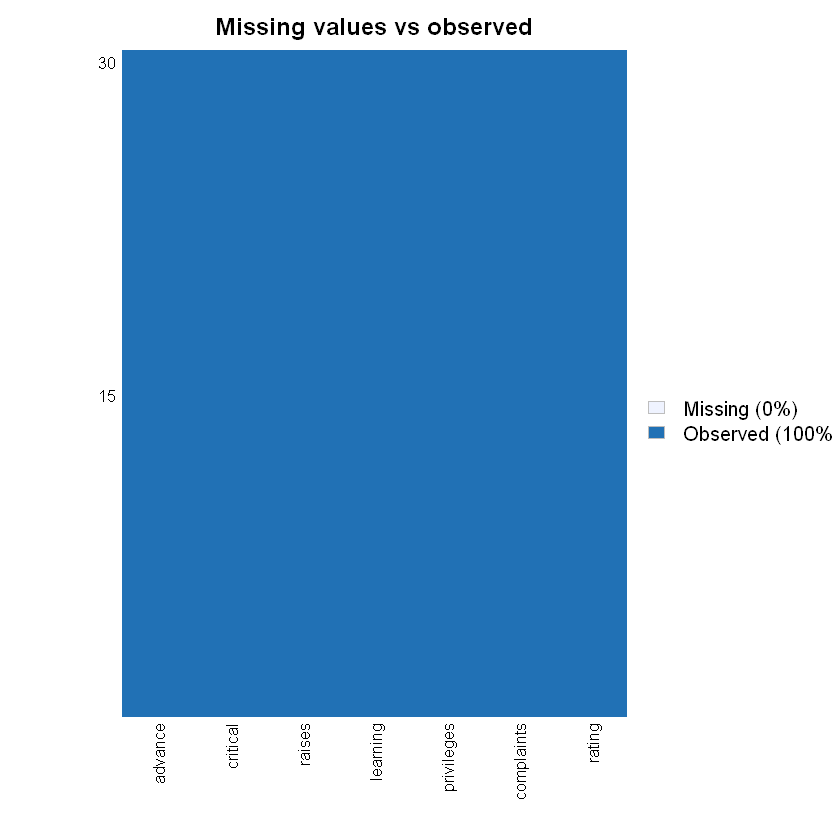

In [8]:
missmap(data, main="Missing values vs observed")

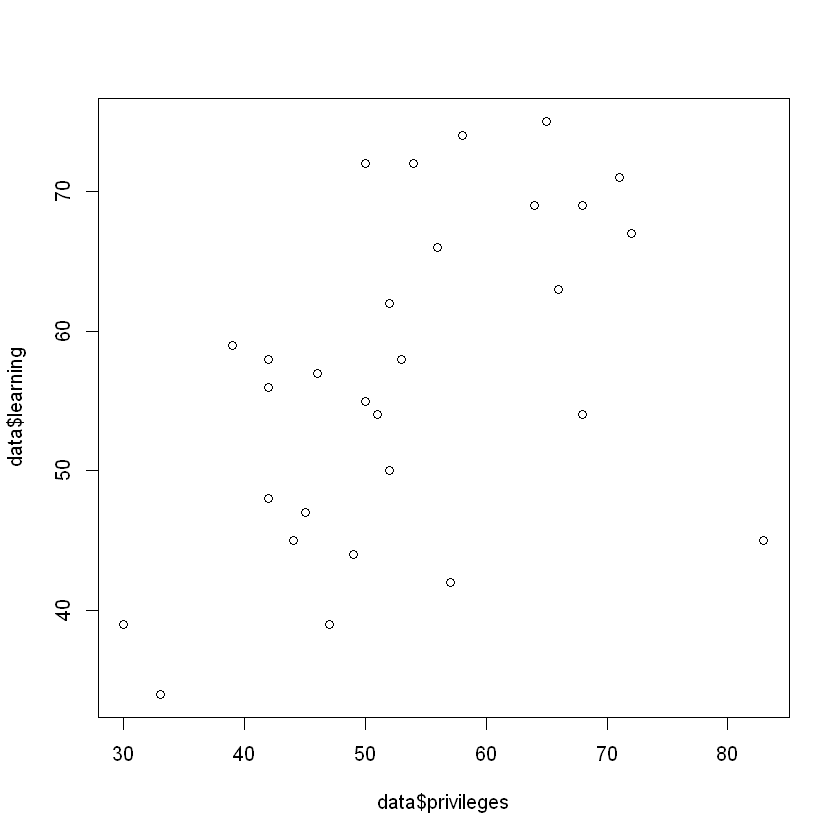

In [9]:
plot(x=data$privileges, y=data$learning)

Nhìn biểu đồ trên ta thấy có thể chia dữ liệu thành 4 cụm, nếu tính cả 4 giá trị nằm đơn lẻ. Cụm dữ liệu ở góc trái và góc phải có vẻ nhỏ so với cụm trên, với chỉ 2 thành phần.

Giữa priviledge và learning không có mối quan hệ tuyến tính rõ ràng.

Nếu không tính 4 giá trị đơn lẻ ngoại lai, thì có thể phân thành 2 cụm.

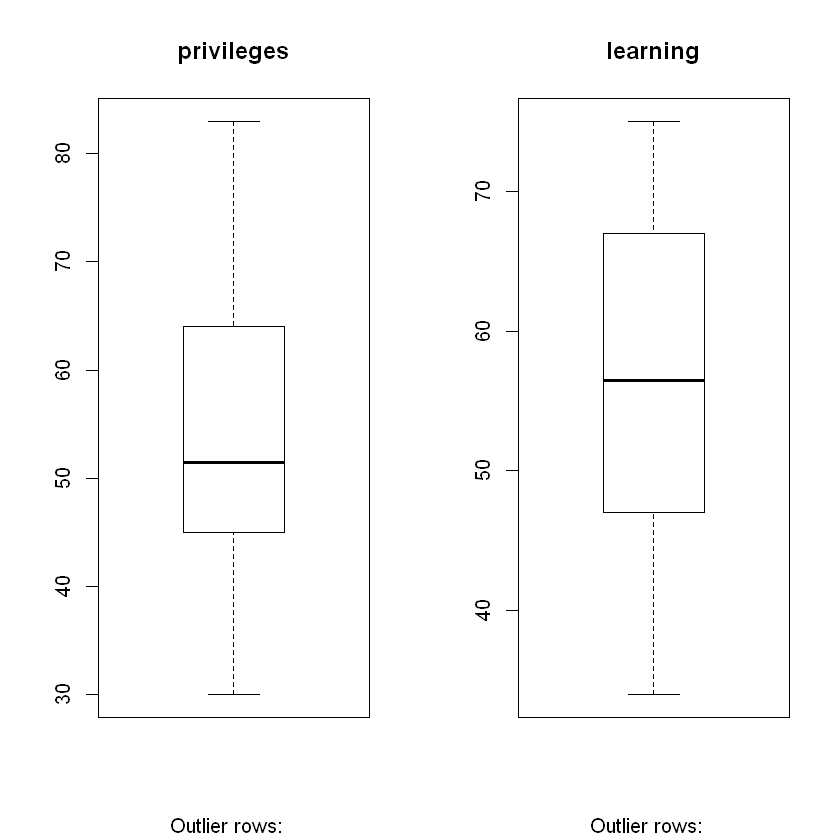

In [27]:
par(mfrow = c(1,2))
boxplot(data$privileges, main="privileges",
       sub=paste("Outlier rows: ", boxplot.stats(data$privileges)$out))
boxplot(data$learning, main="learning",
       sub=paste("Outlier rows: ", boxplot.stats(data$learning)$out))

Box plot cho thấy không có giá trị ngoại lai (outliers) ở privileges và learning

In [10]:
# wss cho ca bo du lieu (1 cum, 2 thuoc tinh)
wss = (nrow(data)-1)*sum(apply(data[,3:4],2,var))

In [11]:
print(wss)

[1] 8336.433


In [15]:
# chon k clusters phu hop
for (i in 1:10) wss[i] = sum(kmeans(data[,3:4],
                                  centers=i,
                                  nstart=20)$withinss)

In [16]:
print(wss)

 [1] 8336.4333 3652.7059 2669.3422 1799.2222 1300.1250  874.4583  697.7976
 [8]  540.7643  412.4667  343.8833


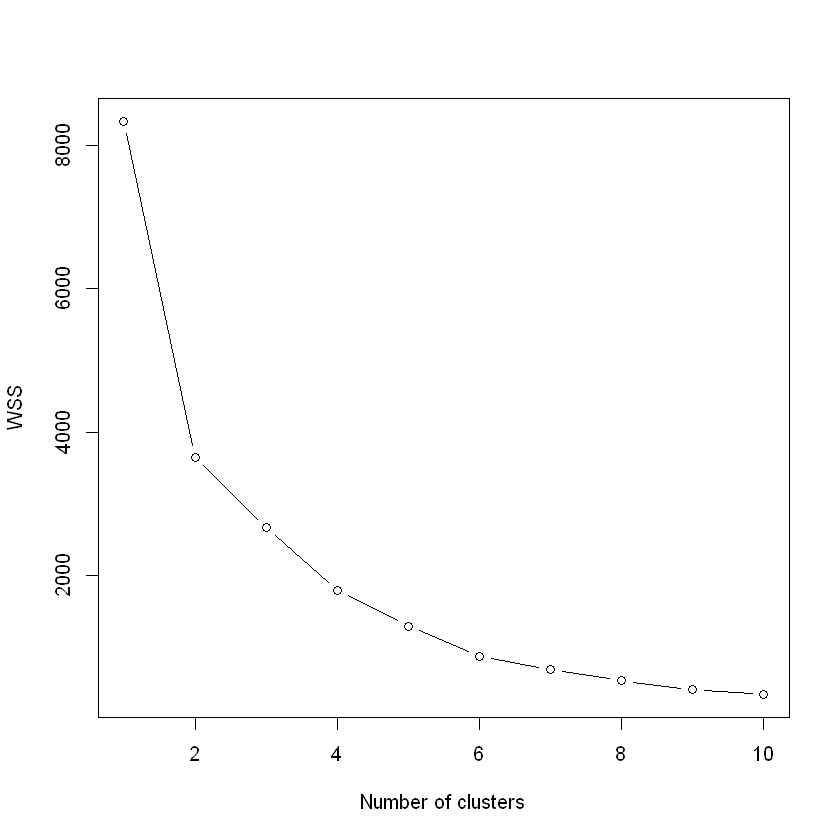

In [18]:
plot(1:10, wss, type="b",
    xlab="Number of clusters",
    ylab="WSS")

Dựa trên biểu đồ trên, với k=4, wss không thay đổi nhiều sau đó. --> chọn k =4

In [12]:
set.seed(20)

In [19]:
dataCluster = kmeans(data[,3:4],centers=4,nstart=20)

In [20]:
print(dataCluster)

K-means clustering with 4 clusters of sizes 2, 10, 9, 9

Cluster means:
  privileges learning
1   75.50000 49.50000
2   62.40000 69.80000
3   47.44444 56.55556
4   43.55556 42.77778

Clustering vector:
 [1] 4 3 2 4 2 4 3 3 2 4 3 4 4 1 2 2 2 2 3 1 4 3 3 3 4 2 2 4 2 3

Within cluster sum of squares by cluster:
[1] 153.0000 630.0000 316.4444 699.7778
 (between_SS / total_SS =  78.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


Có 4 cụm, kích thước lần lượt là 2,10,9,9. Cụm 1 với 2 mẫu ít hơn nhiều so với các cụm còn lại.

In [22]:
print(dataCluster$centers)

  privileges learning
1   75.50000 49.50000
2   62.40000 69.80000
3   47.44444 56.55556
4   43.55556 42.77778


In [23]:
compare = table(dataCluster$cluster)
print(compare)


 1  2  3  4 
 2 10  9  9 


* Cụm đầu tiên có privileges lớn, learning không cao.
* cụm 2 có privileges và learning khoảng 60
* cụm 3 có privileges không cao, learning trung bình (mean của learning = 56)
* cụm 4 có privileges và learning cùng thấp.

In [31]:
predict_df <- data.frame(data, dataCluster$cluster)
predict_df

rating,complaints,privileges,learning,raises,critical,advance,dataCluster.cluster
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
43,51,30,39,61,92,45,4
63,64,51,54,63,73,47,3
71,70,68,69,76,86,48,2
61,63,45,47,54,84,35,4
81,78,56,66,71,83,47,2
43,55,49,44,54,49,34,4
58,67,42,56,66,68,35,3
71,75,50,55,70,66,41,3
72,82,72,67,71,83,31,2


In [24]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



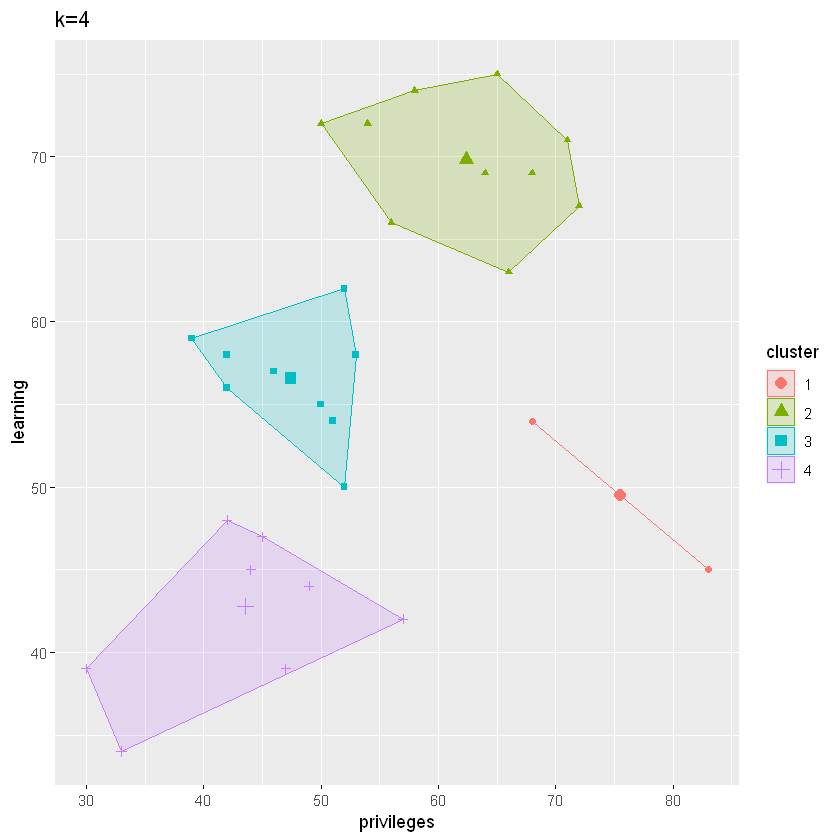

In [26]:
fviz_cluster(dataCluster, geom="point",
            data=data[,3:4], stand=F) + ggtitle("k=4")

* Cụm 1: gồm 2 mẫu có privileges rất cao nhưng learning lại không tương đương. Có thể thấy đây là 2 thành phần không theo quy tắc thường (privileges cao, learning cao)
* Cụm 2: gồm các mẫu có privileges và learning cao, đồng đều, các mẫu này tuân theo quy tắc thường. 
* Cụm 3: gồm các mẫu có giá trị trung bình ở cả privileges lẫn learning.
* Cụm 4: gồm các mẫu có giá trị privileges và learning thấp đều.

4 cụm này cho ta thấy privileges càng cao thì learning càng cao, tuy nhiên có 1 số ngoại lệ như ở cụm 1, privileges cao nhưng learning lại thấp. Có thể dựa vào kết quả này để thay đổi priviledge tùy thuộc đối tượng trong cụm nào.

Dữ liệu này chỉ có 30 mẫu, là 1 số lượng nhỏ khi phân tích. Do đó kết quả số cụm và lượng mẫu trong mỗi cụm cũng có thể bị ảnh hưởng.